------
<div align="center">

# **Sentiment Analysis on Movie Reviews Project**

</div>

------

**Created By : I Gusti Ngurah Ervan Juli Ardana**

---

- # Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Ngurah
[nltk_data]     Ervan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Ngurah
[nltk_data]     Ervan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ngurah
[nltk_data]     Ervan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

- # LOAD DATA

In [2]:
train_set = pd.read_csv('data\\train.csv')
print(train_set)

                                        reviews_content  category
0     airplane ! is considered among many to be the ...  positive
1     you've got to love disney . \nno matter what t...  positive
2      " the tailor of panama " is a different kind ...  positive
3     the characters in jonathan lynn's " the whole ...  negative
4     vikings v . bears ? \nno , this isn't the line...  negative
...                                                 ...       ...
1495  trekkies , roger nygard's energetic and hilari...  positive
1496   " dangerous beauty " is a really nothing more...  positive
1497  starring shawnee smith ; donovan leitch ; rick...  negative
1498  man , this was one wierd movie . \nsimilar to ...  negative
1499  review : ghost dog : the way of the samurai ( ...  positive

[1500 rows x 2 columns]


- # PRE-PROCESSING DATA

- **Lower Case**

In [3]:
train_lower = train_set.copy()
train_lower['reviews_content'] = train_lower['reviews_content'].apply(lambda x: x.lower())
print(train_lower)

                                        reviews_content  category
0     airplane ! is considered among many to be the ...  positive
1     you've got to love disney . \nno matter what t...  positive
2      " the tailor of panama " is a different kind ...  positive
3     the characters in jonathan lynn's " the whole ...  negative
4     vikings v . bears ? \nno , this isn't the line...  negative
...                                                 ...       ...
1495  trekkies , roger nygard's energetic and hilari...  positive
1496   " dangerous beauty " is a really nothing more...  positive
1497  starring shawnee smith ; donovan leitch ; rick...  negative
1498  man , this was one wierd movie . \nsimilar to ...  negative
1499  review : ghost dog : the way of the samurai ( ...  positive

[1500 rows x 2 columns]


- **Remove Punctuaction**

In [4]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

train_remove_punc = train_lower.copy()
train_remove_punc['reviews_content'] = train_lower['reviews_content'].apply(remove_punctuation)
print(train_remove_punc)

                                        reviews_content  category
0     airplane  is considered among many to be the e...  positive
1     youve got to love disney  \nno matter what the...  positive
2       the tailor of panama  is a different kind of...  positive
3     the characters in jonathan lynns  the whole ni...  negative
4     vikings v  bears  \nno  this isnt the lineup f...  negative
...                                                 ...       ...
1495  trekkies  roger nygards energetic and hilariou...  positive
1496    dangerous beauty  is a really nothing more t...  positive
1497  starring shawnee smith  donovan leitch  ricky ...  negative
1498  man  this was one wierd movie  \nsimilar to co...  negative
1499  review  ghost dog  the way of the samurai  199...  positive

[1500 rows x 2 columns]


- **Remove White Spaces**

In [5]:
def remove_whitespace(text):
    return  " ".join(text.split())

train_removoe_white_space = train_remove_punc.copy()
train_removoe_white_space['reviews_content'] = train_remove_punc['reviews_content'].apply(remove_whitespace)
print(train_removoe_white_space)

                                        reviews_content  category
0     airplane is considered among many to be the ep...  positive
1     youve got to love disney no matter what they s...  positive
2     the tailor of panama is a different kind of sp...  positive
3     the characters in jonathan lynns the whole nin...  negative
4     vikings v bears no this isnt the lineup for mo...  negative
...                                                 ...       ...
1495  trekkies roger nygards energetic and hilarious...  positive
1496  dangerous beauty is a really nothing more than...  positive
1497  starring shawnee smith donovan leitch ricky pa...  negative
1498  man this was one wierd movie similar to conspi...  negative
1499  review ghost dog the way of the samurai 1999 c...  positive

[1500 rows x 2 columns]


- **Removing the number**

In [6]:
import re

def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

train_remove_num = train_removoe_white_space.copy()
train_remove_num['reviews_content'] = train_removoe_white_space['reviews_content'].apply(remove_numbers)
print(train_remove_num)

                                        reviews_content  category
0     airplane is considered among many to be the ep...  positive
1     youve got to love disney no matter what they s...  positive
2     the tailor of panama is a different kind of sp...  positive
3     the characters in jonathan lynns the whole nin...  negative
4     vikings v bears no this isnt the lineup for mo...  negative
...                                                 ...       ...
1495  trekkies roger nygards energetic and hilarious...  positive
1496  dangerous beauty is a really nothing more than...  positive
1497  starring shawnee smith donovan leitch ricky pa...  negative
1498  man this was one wierd movie similar to conspi...  negative
1499  review ghost dog the way of the samurai  cast ...  positive

[1500 rows x 2 columns]


- **Remove Stop Words & Tokenize**

In [7]:
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return filtered_text

train_remove_stopwords = train_remove_num.copy()
train_remove_stopwords['reviews_content'] = train_remove_num['reviews_content'].apply(remove_stopwords)
print(train_remove_stopwords)

                                        reviews_content  category
0     [airplane, considered, among, many, epitome, s...  positive
1     [youve, got, love, disney, matter, serve, guar...  positive
2     [tailor, panama, different, kind, spy, movie, ...  positive
3     [characters, jonathan, lynns, whole, nine, yar...  negative
4     [vikings, v, bears, isnt, lineup, monday, nigh...  negative
...                                                 ...       ...
1495  [trekkies, roger, nygards, energetic, hilariou...  positive
1496  [dangerous, beauty, really, nothing, grandiose...  positive
1497  [starring, shawnee, smith, donovan, leitch, ri...  negative
1498  [man, one, wierd, movie, similar, conspiracy, ...  negative
1499  [review, ghost, dog, way, samurai, cast, fores...  positive

[1500 rows x 2 columns]


- **Stemming**

In [8]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer = PorterStemmer()

# stem words in the list of tokenized words
def stem_words(text):
    stems = [stemmer.stem(word) for word in text]
    return stems

train_stem = train_remove_stopwords.copy()
train_stem['reviews_content'] = train_remove_stopwords['reviews_content'].apply(stem_words)
print(train_stem)

                                        reviews_content  category
0     [airplan, consid, among, mani, epitom, satir, ...  positive
1     [youv, got, love, disney, matter, serv, guaran...  positive
2     [tailor, panama, differ, kind, spi, movi, desp...  positive
3     [charact, jonathan, lynn, whole, nine, yard, y...  negative
4     [vike, v, bear, isnt, lineup, monday, night, f...  negative
...                                                 ...       ...
1495  [trekki, roger, nygard, energet, hilari, docum...  positive
1496  [danger, beauti, realli, noth, grandios, soap,...  positive
1497  [star, shawne, smith, donovan, leitch, ricki, ...  negative
1498  [man, one, wierd, movi, similar, conspiraci, t...  negative
1499  [review, ghost, dog, way, samurai, cast, fores...  positive

[1500 rows x 2 columns]


- **Lemmaization**

In [ ]:
# from nltk.stem import WordNetLemmatizer

# lemmatizer = WordNetLemmatizer()

# # stem words in the list of tokenized words
# def lem_words(text):
#     lemmatizes = [lemmatizer.lemmatize(word) for word in text]
#     return lemmatizes

# train_lemma = train_stem.copy()
# train_lemma['reviews_content'] = train_stem['reviews_content'].apply(lem_words)
# print(train_lemma)

- # FEATURE EXTRACTION

- **TF IDF**

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


train_data = train_stem.copy()

train_data['content'] = train_stem['reviews_content'].apply(lambda x: ' '.join(x))
train_data['label'] = train_stem['category']

x = train_data['content']
y = train_data['label']

tfidf_vectorizer = TfidfVectorizer()

x_tfidf = tfidf_vectorizer.fit_transform(x)

tfidf_df = pd.DataFrame(x_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_df)

       aa  aaa  aaaaaaaahhhh  aaaaaah  aaaahhh  aah  aardman  aaron  aatish  \
0     0.0  0.0           0.0      0.0      0.0  0.0      0.0    0.0     0.0   
1     0.0  0.0           0.0      0.0      0.0  0.0      0.0    0.0     0.0   
2     0.0  0.0           0.0      0.0      0.0  0.0      0.0    0.0     0.0   
3     0.0  0.0           0.0      0.0      0.0  0.0      0.0    0.0     0.0   
4     0.0  0.0           0.0      0.0      0.0  0.0      0.0    0.0     0.0   
...   ...  ...           ...      ...      ...  ...      ...    ...     ...   
1495  0.0  0.0           0.0      0.0      0.0  0.0      0.0    0.0     0.0   
1496  0.0  0.0           0.0      0.0      0.0  0.0      0.0    0.0     0.0   
1497  0.0  0.0           0.0      0.0      0.0  0.0      0.0    0.0     0.0   
1498  0.0  0.0           0.0      0.0      0.0  0.0      0.0    0.0     0.0   
1499  0.0  0.0           0.0      0.0      0.0  0.0      0.0    0.0     0.0   

       ab  ...  zuckerabrahamszuck  zuehlk  zuko  z

- **N-Grams**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

train_data = train_lemma.copy()

train_data['content'] = train_lemma['reviews_content'].apply(lambda x: ' '.join(x))
train_data['label'] = train_lemma['category']

x = train_data['content']
y = train_data['label']

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))  

x_features = tfidf_vectorizer.fit_transform(x)

feature_names = tfidf_vectorizer.get_feature_names_out()
ngrams_df = pd.DataFrame(x_features.toarray(), columns=feature_names)

print(ngrams_df)

       aa  aa meet  aaa  aaa minor  aaa team  aaaaaaaahhhh  aaaaaaaahhhh plot  \
0     0.0      0.0  0.0        0.0       0.0           0.0                0.0   
1     0.0      0.0  0.0        0.0       0.0           0.0                0.0   
2     0.0      0.0  0.0        0.0       0.0           0.0                0.0   
3     0.0      0.0  0.0        0.0       0.0           0.0                0.0   
4     0.0      0.0  0.0        0.0       0.0           0.0                0.0   
...   ...      ...  ...        ...       ...           ...                ...   
1495  0.0      0.0  0.0        0.0       0.0           0.0                0.0   
1496  0.0      0.0  0.0        0.0       0.0           0.0                0.0   
1497  0.0      0.0  0.0        0.0       0.0           0.0                0.0   
1498  0.0      0.0  0.0        0.0       0.0           0.0                0.0   
1499  0.0      0.0  0.0        0.0       0.0           0.0                0.0   

      aaaaaah  aaaaaah film

- # Develop Model

**1.A Logistic Regression Model Using TF IDF**

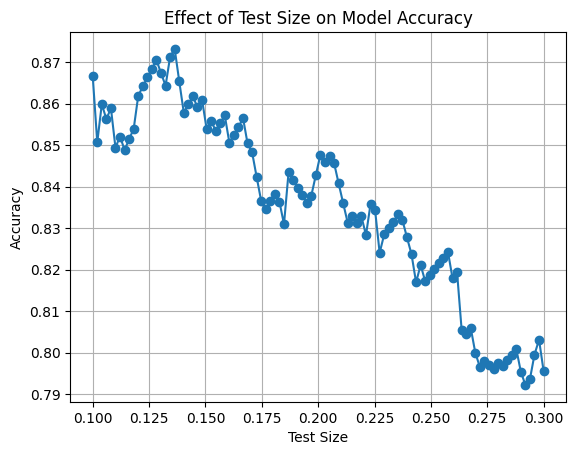

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

test_sizes = []
accuracies = []

test_size_range = np.linspace(0.1, 0.3, 100) 

for test_size in test_size_range:
    X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y, test_size=test_size, random_state=5)

    logistic_regression_model = LogisticRegression()
    logistic_regression_model.fit(X_train, y_train)

    # Calculate accuracy
    accuracy = logistic_regression_model.score(X_test, y_test)

    test_sizes.append(test_size)
    accuracies.append(accuracy)

# Plotting the graph
plt.plot(test_sizes, accuracies, marker='o')
plt.title('Effect of Test Size on Model Accuracy')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [26]:
from sklearn.linear_model import LogisticRegression

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y, test_size=0.129, random_state=5)

# Train Model
logistic_regression_model = LogisticRegression(C=2, solver='liblinear',penalty='l2', verbose=4)
logistic_regression_model.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=2, solver='liblinear', verbose=4)

In [27]:
logistic_regression_model.score(X_test,y_test)

0.8814432989690721

In [ ]:
logistic_regression_model.classes_

array(['negative', 'positive'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report
y_pred = logistic_regression_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.87      0.88      0.87        99
    positive       0.87      0.86      0.87        95

    accuracy                           0.87       194
   macro avg       0.87      0.87      0.87       194
weighted avg       0.87      0.87      0.87       194



**1.B Linier Regression Using N grams**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt


test_sizes = []
accuracies = []

test_size_range = np.linspace(0.1, 0.3, 100)

for test_size in test_size_range:
    X_train, X_test, y_train, y_test = train_test_split(ngrams_df, y, test_size=test_size, random_state=5)

    logistic_regression_model_ngrams = LogisticRegression()
    logistic_regression_model_ngrams.fit(X_train, y_train)

    accuracy = logistic_regression_model_ngrams.score(X_test, y_test)

    test_sizes.append(test_size)
    accuracies.append(accuracy)

# Plotting the graph
plt.plot(test_sizes, accuracies, marker='o')
plt.title('Effect of Test Size on Model Accuracy')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ngrams_df, y, test_size=0.130, random_state=5)

# Train Model
logistic_regression_model_ngrams = LogisticRegression()
logistic_regression_model_ngrams.fit(X_train, y_train)

In [ ]:
logistic_regression_model_ngrams.score(X_test,y_test)

**2. Naive Bayes**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

test_sizes = []
accuracies = []

test_size_range = np.linspace(0.1, 0.3, 100) 

for test_size in test_size_range:
    X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y, test_size=test_size, random_state=5)

    mnb = MultinomialNB()
    mnb.fit(X_train, y_train)

    accuracy = mnb.score(X_test, y_test)

    test_sizes.append(test_size)
    accuracies.append(accuracy)

# Plotting the graph
plt.plot(test_sizes, accuracies, marker='o')
plt.title('Effect of Test Size on Model Accuracy')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [12]:
from sklearn.naive_bayes import MultinomialNB

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y, test_size=0.099, random_state=5)

# Train Model
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [13]:
mnb.score(X_test,y_test)

0.825503355704698

**3. Random Forest**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
import numpy as np
import matplotlib.pyplot as plt

test_sizes = []
accuracies = []

test_size_range = np.linspace(0.1, 0.3, 100)  


for test_size in test_size_range:
    X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y, test_size=test_size, random_state=5)

    
    random_forest_model = RandomForestClassifier()  
    random_forest_model.fit(X_train, y_train)

    # Calculate accuracy
    accuracy = random_forest_model.score(X_test, y_test)

    test_sizes.append(test_size)
    accuracies.append(accuracy)

# Plotting the graph
plt.plot(test_sizes, accuracies, marker='o')
plt.title('Effect of Test Size on Model Accuracy (Random Forest)')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y, test_size=0.171, random_state=5)


random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train,y_train)

RandomForestClassifier()

In [15]:
random_forest_model.score(X_test,y_test)

0.77431906614786

**4. SVC**

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC  # Import Support Vector Classifier
# import numpy as np
# import matplotlib.pyplot as plt

# # Initialize lists to store test sizes and corresponding accuracies
# test_sizes = []
# accuracies = []

# # Define a range of test sizes to explore
# test_size_range = np.linspace(0.1, 0.3, 100)  # Adjust the number of points as needed

# # Iterate over different test sizes
# for test_size in test_size_range:
#     # Split data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y, test_size=test_size, random_state=5)

#     # Train Model
#     svm_model = SVC()  # Initialize Support Vector Classifier
#     svm_model.fit(X_train, y_train)

#     # Calculate accuracy
#     accuracy = svm_model.score(X_test, y_test)

#     # Append test size and accuracy to lists
#     test_sizes.append(test_size)
#     accuracies.append(accuracy)

# # Plotting the graph
# plt.plot(test_sizes, accuracies, marker='o')
# plt.title('Effect of Test Size on Model Accuracy (SVM)')
# plt.xlabel('Test Size')
# plt.ylabel('Accuracy')
# plt.grid(True)
# plt.show()

- # Hyperparameter Tuning

**Grid Search CV**

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
search_space = {
    'C': [1, 2, 3],  
    'penalty': ['l1', 'l2'],            
    'solver': ['liblinear', 'lbfgs']    
}

In [18]:
logistic_regression_model = LogisticRegression()

GS = GridSearchCV(estimator=logistic_regression_model,
                  param_grid=search_space,
                  scoring='accuracy',  
                  cv=5,
                  verbose=4)

In [21]:
GS.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .C=1, penalty=l1, solver=liblinear;, score=0.743 total time=   0.5s
[CV 2/5] END .C=1, penalty=l1, solver=liblinear;, score=0.723 total time=   0.4s
[CV 3/5] END .C=1, penalty=l1, solver=liblinear;, score=0.707 total time=   0.4s
[CV 4/5] END .C=1, penalty=l1, solver=liblinear;, score=0.706 total time=   0.4s
[CV 5/5] END .C=1, penalty=l1, solver=liblinear;, score=0.758 total time=   0.4s
[CV 1/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END .C=1, penalty=l2, solver=liblinear;, score=0.783 total time=   0.3s
[CV 2/5] END .C=1, penalty=l2, solver=liblinear;

c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python310\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Python310\lib\site-packages\sklearn\

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy', verbose=4)

In [22]:
from sklearn.model_selection import GridSearchCV

best_model = GS.best_estimator_

In [23]:
best_model

LogisticRegression(C=3)

- # Predict Test

In [28]:
test_set = pd.read_csv('data\\test.csv')
print(test_set)

                                       reviews_content
0    towards the middle of " the sweet hereafter , ...
1    wild things is a suspenseful thriller starring...
2    hong kong cinema has been going through a bad ...
3    while alex browning ( devon sawa ) waits at jf...
4    sometimes i find 19th century british costume ...
..                                                 ...
495  luckily , some people got starship troopers . ...
496  trailing the success of brit humour in the mov...
497  seen february 15 , 1998 on home video ( borrow...
498  matthew broderick and high school comedy . \nt...
499  the 1998 summer movie season is still in its i...

[500 rows x 1 columns]


**Pre-Processing**

In [29]:
test_set['reviews_content'] = test_set['reviews_content'].apply(lambda x: x.lower())
test_set['reviews_content'] = test_set['reviews_content'].apply(remove_punctuation)
test_set['reviews_content'] = test_set['reviews_content'].apply(remove_whitespace)
test_set['reviews_content'] = test_set['reviews_content'].apply(remove_numbers)
test_set['reviews_content'] = test_set['reviews_content'].apply(remove_stopwords)
test_set['reviews_content'] = test_set['reviews_content'].apply(stem_words)

In [30]:
print(test_set["reviews_content"])

0      [toward, middl, sweet, hereaft, crowd, school,...
1      [wild, thing, suspens, thriller, star, matt, d...
2      [hong, kong, cinema, go, bad, spell, last, pro...
3      [alex, brown, devon, sawa, wait, jfk, leav, sc...
4      [sometim, find, th, centuri, british, costum, ...
                             ...                        
495    [luckili, peopl, got, starship, trooper, peopl...
496    [trail, success, brit, humour, movi, industri,...
497    [seen, februari, home, video, borrow, chri, we...
498    [matthew, broderick, high, school, comedi, two...
499    [summer, movi, season, still, infanc, diasappo...
Name: reviews_content, Length: 500, dtype: object


In [31]:
test_set = test_set["reviews_content"].apply(lambda x: ' '.join(x))

x_tfidf = tfidf_vectorizer.transform(test_set)
tfidf_test = pd.DataFrame(x_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [32]:
tfidf_test

,aa,aaa,aaaaaaaahhhh,aaaaaah,aaaahhh,aah,aardman,aaron,aatish,ab,...,zuckerabrahamszuck,zuehlk,zuko,zulu,zundel,zurg,zweibel,zwick,zwigoff,zyci
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
predictions = logistic_regression_model.predict(tfidf_test)

In [34]:
predictions.shape

(500,)

In [35]:
df = pd.DataFrame({'Row': range(1, 501), 'Label': predictions})

# Print the DataFrame
print(df)

     Row     Label
0      1  positive
1      2  positive
2      3  positive
3      4  positive
4      5  negative
..   ...       ...
495  496  positive
496  497  positive
497  498  positive
498  499  positive
499  500  positive

[500 rows x 2 columns]


In [38]:
# Export DataFrame to CSV
output_csv_path = 'result\\result.csv'
df[['Row', 'Label']].to_csv(output_csv_path, index=False)

# Print a message confirming the export
print("DataFrame exported to CSV:", output_csv_path)

DataFrame exported to CSV: result\result.csv
